# Simple Fashion-MNIST convnet

Largely taken from [MNIST](https://keras.io/examples/vision/mnist_convnet/)'s example by [fchollet](https://twitter.com/fchollet)<br>

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
plt.ion()

## Prepare the data

In [2]:
id2class = {0: "T-shirt/top",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankle boot",}

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_test_inf, y_test_inf = x_test.copy(), y_test.copy()

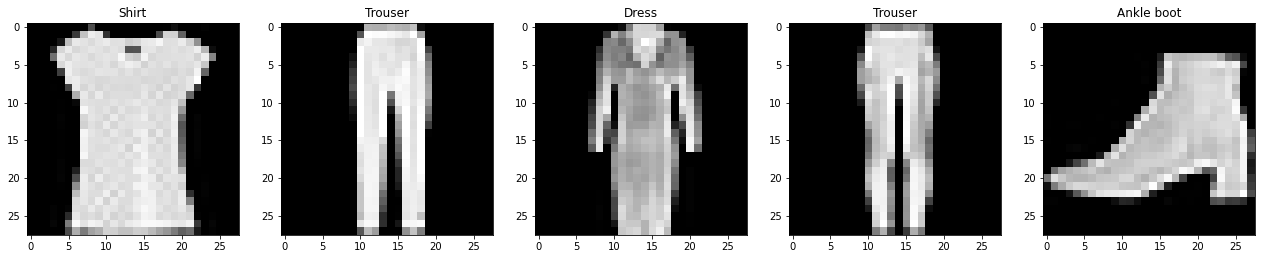

In [4]:
idx = np.random.randint(0, high=len(x_train), size=5)
figs, axes = plt.subplots(ncols=5, figsize=(22, 4))
for ax, i in zip(axes, idx): 
    ax.imshow(x_train[i], cmap='gray');
    ax.set_title(id2class[y_train[i]])

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [6]:

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(16, kernel_size=(1, 1), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [7]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 320us/sample - loss: 0.6874 - accuracy: 0.7494 - val_loss: 0.4467 - val_accuracy: 0.8412
Epoch 2/5
54000/54000 [==============================] - 17s 311us/sample - loss: 0.4539 - accuracy: 0.8368 - val_loss: 0.3840 - val_accuracy: 0.8620
Epoch 3/5
54000/54000 [==============================] - 17s 319us/sample - loss: 0.4038 - accuracy: 0.8549 - val_loss: 0.3570 - val_accuracy: 0.8682
Epoch 4/5
54000/54000 [==============================] - 17s 320us/sample - loss: 0.3759 - accuracy: 0.8651 - val_loss: 0.3337 - val_accuracy: 0.8828
Epoch 5/5
54000/54000 [==============================] - 17s 318us/sample - loss: 0.3497 - accuracy: 0.8750 - val_loss: 0.3143 - val_accuracy: 0.8887


## Evaluate the trained model

In [8]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.33025740029811856
Test accuracy: 0.8843


## Save model

In [9]:
model.save("fashion_mnist")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fashion_mnist\assets


## Inference

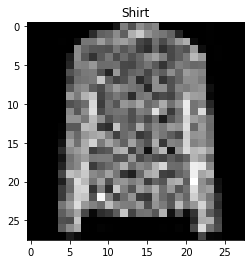

In [4]:
idx = 1004
im = x_test_inf[idx]
plt.imshow(im, cmap="gray")
plt.title(id2class[y_test_inf[idx]]);

In [43]:
im = im.astype("float32") / 255
im = np.expand_dims(im, -1)[None]
im.shape

(1, 28, 28, 1)

In [44]:
f"Predicted Class: {id2class[np.argmax(model.predict(im))]}"

'Predicted Class: T-shirt/top'

In [6]:
print(x_test_inf[idx].tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 126, 81, 142, 119, 133, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 44, 96, 103, 138, 95, 174, 201, 146, 126, 118, 99, 38, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 14, 118, 119, 155, 122, 149, 158, 136, 71, 57, 113, 75, 110, 150, 172, 11, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 138, 102, 87, 85, 82, 119, 87, 107, 63, 44, 102, 49, 72, 94, 81, 155, 14, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 30, 140, 87, 51, 90, 119, 76, 107, 82, 102, 138, 160, 126, 71, 93, 121, 183, 155, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 39, 130, 127, 150, 108, 109, 112, 72, 70, 98, 117, 89, 52, 90, 126, 116, 104, 107, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 82, 103, 122, 124, 81, 35, 150, 75, 99, 108, 70, 109, 94, 140, 104, 154, 142, 133, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 56, 112, 117, 123, 196, 98, 65, 82, 119, 44, 77, 142, 52, 80, 102, 141, 140, 124, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 89, 130, 140, 93, 75, 122, 154, 130, 118, 108, 38, 141, 141, 81, 131, 124, 138, 147, 16, 0, 0, 0, 0], 

For the below cell to work you must have a web app up-and-running and listening on port 5000

In [16]:
import requests
import json

im = x_test_inf[idx].tolist()
data = {'image': im}
URL = 'http://127.0.0.1:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")

Prediction = Shirt
